In [22]:
import pandas as p
import numpy as np
import matplotlib.pyplot as m
import warnings
warnings.filterwarnings('ignore')

In [23]:
d=p.read_csv('D:\iris.csv')
print(d)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [24]:
d.drop(['SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   PetalLengthCm  150 non-null    float64
 2   PetalWidthCm   150 non-null    float64
 3   Species        150 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


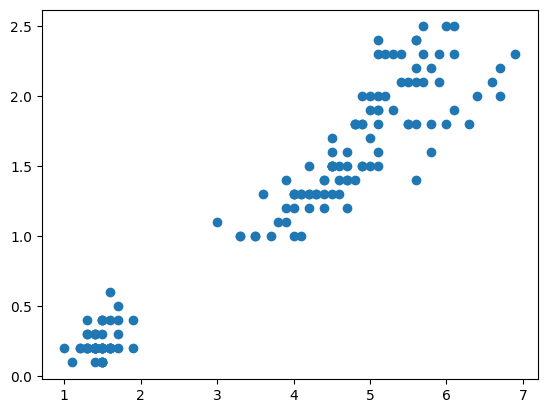

In [26]:
m.scatter(d['PetalLengthCm'],d['PetalWidthCm'])

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [28]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [29]:
ypred=km.fit_predict(d[['PetalLengthCm','PetalWidthCm']])
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
d['cluster']=ypred
d.head()

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,1.4,0.2,Iris-setosa,1
1,2,1.4,0.2,Iris-setosa,1
2,3,1.3,0.2,Iris-setosa,1
3,4,1.5,0.2,Iris-setosa,1
4,5,1.4,0.2,Iris-setosa,1


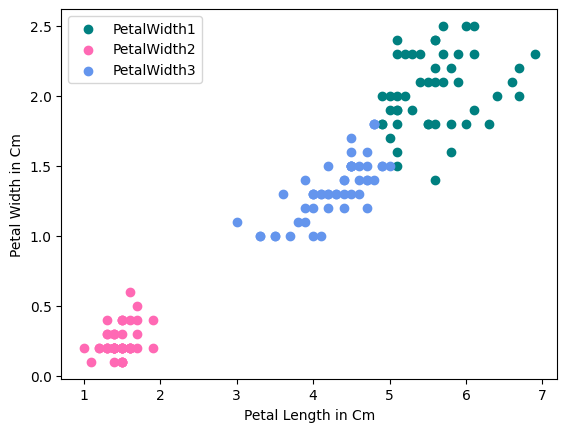

In [31]:
d1= d[d.cluster==0]
d2= d[d.cluster==1]
d3= d[d.cluster==2]

#PLOTTING IN SCATTER PLOT
m.scatter(d1.PetalLengthCm, d1['PetalWidthCm'], color='teal' ,label='PetalWidth1')
m.scatter(d2.PetalLengthCm, d2['PetalWidthCm'], color='hotpink' ,label='PetalWidth2')
m.scatter(d3.PetalLengthCm, d3['PetalWidthCm'], color='cornflowerblue' ,label='PetalWidth3')
m.xlabel('Petal Length in Cm')
m.ylabel('Petal Width in Cm')
m.legend()

In [32]:
scaler = MinMaxScaler() 
d['PetalLengthCm'] = scaler.fit_transform(d[['PetalLengthCm']])
d.head()

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.067797,0.2,Iris-setosa,1
1,2,0.067797,0.2,Iris-setosa,1
2,3,0.050847,0.2,Iris-setosa,1
3,4,0.084746,0.2,Iris-setosa,1
4,5,0.067797,0.2,Iris-setosa,1


In [33]:
scaler = MinMaxScaler() 
d['PetalWidthCm'] = scaler.fit_transform(d[['PetalWidthCm']])
d.head()

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,0.067797,0.041667,Iris-setosa,1
1,2,0.067797,0.041667,Iris-setosa,1
2,3,0.050847,0.041667,Iris-setosa,1
3,4,0.084746,0.041667,Iris-setosa,1
4,5,0.067797,0.041667,Iris-setosa,1


In [34]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(d[['PetalLengthCm','PetalWidthCm']])
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
d['cluster']=ypred
d.tail()

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
145,146,0.711864,0.916667,Iris-virginica,2
146,147,0.677966,0.750000,Iris-virginica,2
147,148,0.711864,0.791667,Iris-virginica,2
148,149,0.745763,0.916667,Iris-virginica,2
149,150,0.694915,0.708333,Iris-virginica,2


In [36]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07864407, 0.06      ],
       [0.7740113 , 0.81510417]])

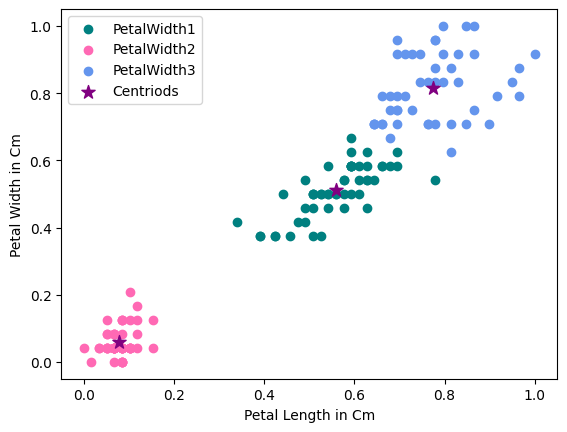

In [37]:
d1= d[d.cluster==0]
d2= d[d.cluster==1]
d3= d[d.cluster==2]

#PLOTTING IN SCATTER PLOT
m.scatter(d1.PetalLengthCm, d1['PetalWidthCm'], color='teal' ,label='PetalWidth1')
m.scatter(d2.PetalLengthCm, d2['PetalWidthCm'], color='hotpink' ,label='PetalWidth2')
m.scatter(d3.PetalLengthCm, d3['PetalWidthCm'], color='cornflowerblue' ,label='PetalWidth3')
m.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color= 'purple',marker='*', s=100, label='Centriods')
m.xlabel('Petal Length in Cm')
m.ylabel('Petal Width in Cm')
m.legend()

In [38]:
k=range(1,10)
sse=[]
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(d[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)
sse

[28.391514358368717,
 5.179687509974785,
 1.7050986081225128,
 1.1701551596644602,
 1.0117449302320312,
 0.8014225825308854,
 0.5822795608308257,
 0.5717359700787521,
 0.4169040838779172]

Text(0.5, 1.0, 'Elbow Method for Optimal k')

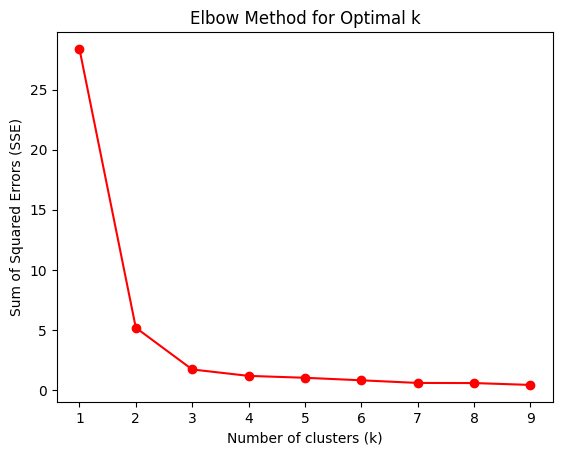

In [39]:
m.plot(k, sse,color='red', marker='o') 
m.xlabel('Number of clusters (k)') 
m.ylabel('Sum of Squared Errors (SSE)') 
m.title('Elbow Method for Optimal k')

In [1]:
import pandas as p
import numpy as np
import matplotlib.pyplot as m
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=p.read_csv('D:\iris.csv')
print(d)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [32]:
d.drop('Id',axis=1,inplace=True)

In [33]:
x = d.iloc[:, :-1] # All rows, all columns except the last one # Create Series for the target (last column) 
y = d.iloc[:, -1] # All rows, only the last column # Print to check 
print(x.head()) 
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=2)
x_train_k_best = select_k_best.fit_transform(x_train, y_train)

print("Selected features:", x_train.columns[select_k_best.get_support()])

Selected features: Index(['PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply RFE with logistic regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
x_train_rfe = rfe.fit_transform(x_train, y_train)

print("Selected features:", x_train.columns[rfe.get_support()])

Selected features: Index(['PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [37]:
 from sklearn.ensemble import RandomForestClassifier

# Train random forest and get feature importances
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_

# Display feature importances
feature_importances = p.Series(importances, index=x_train.columns)
print(feature_importances.sort_values(ascending=False))

PetalWidthCm     0.446036
PetalLengthCm    0.427145
SepalLengthCm    0.093935
SepalWidthCm     0.032885
dtype: float64
